In [40]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *


from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
run36 = spinup()
run36.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18 = spinup()
run18.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [14]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
phc = Phc()

In [121]:
sponge = StateRead()
sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[90*3 ,90*3 + 90])
print sponge.data['days']/(60*60*24*360)

[ 175.  180.]


In [123]:
sponge = StateRead()
sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',range(1080-90,1080,1))
sponge.baroCalc()
nosponge = StateRead()
nosponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',range(270,360,1))
nosponge.baroCalc()
sponge.fluxCalc()
nosponge.fluxCalc()

In [124]:
class Sponge:
    def __init__(self):
        self.title = []
    def read(self,data,title):
        self.lat = data.lat
        self.lon = data.lon
        self.T = np.nanmean(data.data['T'],axis=0)
        self.S = np.nanmean(data.data['S'],axis=0)
        self.title = title
        self.depth = data.depth
run_sponge = Sponge()
run_sponge.read(sponge,'sponge run')
run_nosponge = Sponge()
run_nosponge.read(nosponge,'nosponge run')

In [125]:
comp_data = {'run_nosponge' : run_nosponge, 'run_sponge' : run_sponge , \
             'Nemo25' : Nemo25 ,'woa' : woa, 'Noaa' : Noaa} 

In [49]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2,z1,z2):
    def plot_field2(vimin=10,vimax=-10,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        if len(field.shape) == 3:
            masked_array = np.ma.array(field[time,:,:], mask=np.isnan(field[time,:,:]))
        elif len(field.shape) == 4:
            masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        elif len(field.shape) == 2:
            masked_array = np.ma.array(field[:,:], mask=np.isnan(field[:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(z1,z2))
    display(w)

Average of the first 20 years with no sponge on OBCS

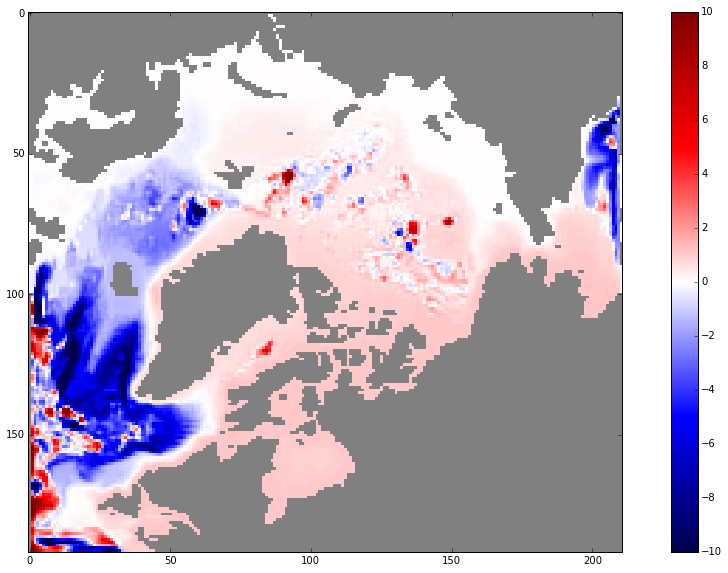

In [126]:
interact(np.nanmean(nosponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the first 20 years with sponge on OBCS

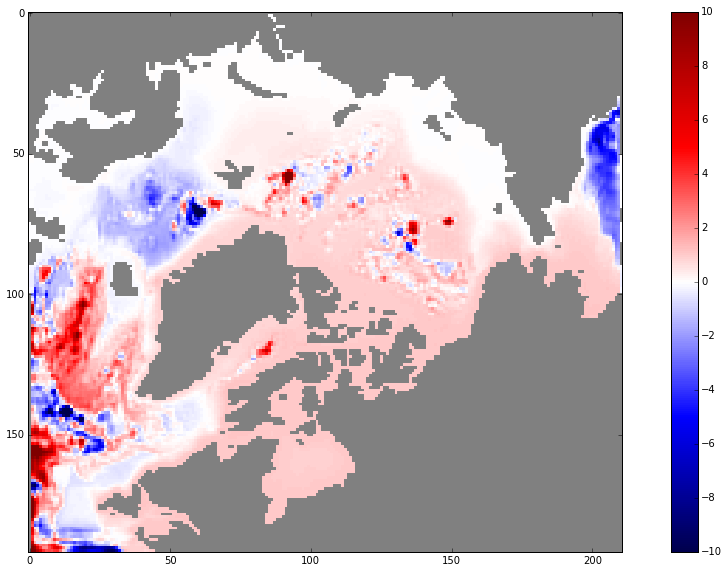

In [127]:
interact(np.nanmean(sponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

Average of the difference between the first 20 years with no sponge and with sponge on OBCS

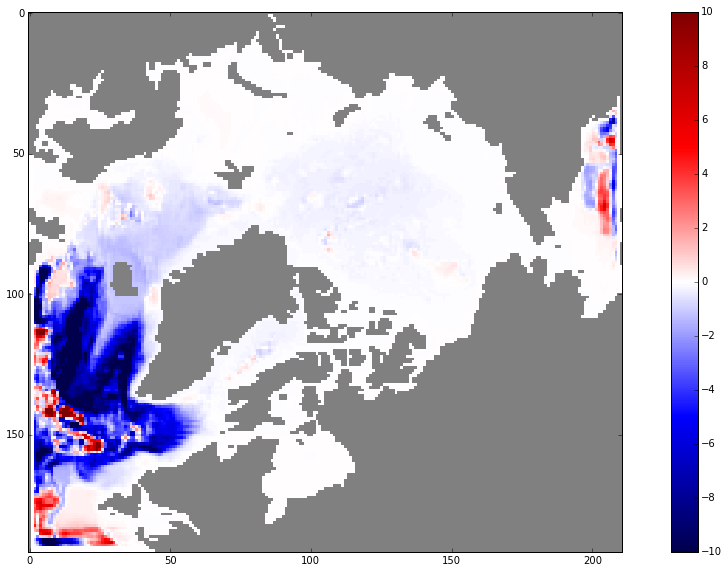

In [128]:
interact(np.nanmean(nosponge.psi,axis=0) - np.nanmean(sponge.psi,axis=0),matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=100,z1=0,z2=50)

In [114]:
run_36km = MonitorRead()
run_36km.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600])
#run_ERA_tempcorr0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',[0,518400,1036800,1555200,2073600,2592000,3110400,3628800,4147200,4665600,5184000,5702400,6220800,6739200,7257600,7776000,8294400,8812800])
run_36km.title('no sponge','blue')

run_sponge = MonitorRead()
run_sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200])
run_sponge.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',[0,777600,1555200])
run_sponge.title('sponge','red')

run_9km = MonitorRead()
run_9km.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/results/',[0])
run_9km.title('9 km started with new spin','green')

run_9km1 = MonitorRead()
run_9km1.readData('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/resultsfirst/',[0])
run_9km1.readDynStDiag('/hpcdata/scratch/am8e13/run_template_9km/run_tempcorr/resultsfirst/',[0])
run_9km1.title('9 km started with old spin','yellow')

In [115]:
titles_lv = { 'run_36km' : 'no sponge','run_18km' : 'run 18km' , 'run_9km' : 'run 9km' , 'run_sponge' : 'run_sponge' }
monitor_list1 = {'run_36km' : run_36km , \
                'run_sponge' : run_sponge,
                'run_9km' : run_9km, 'run_9km1' : run_9km1}

9 km started with new spin green
sponge red
9 km started with old spin yellow
no sponge blue
9 km started with new spin green
sponge red
9 km started with old spin yellow
no sponge blue
9 km started with new spin green
sponge red
9 km started with old spin yellow
no sponge blue


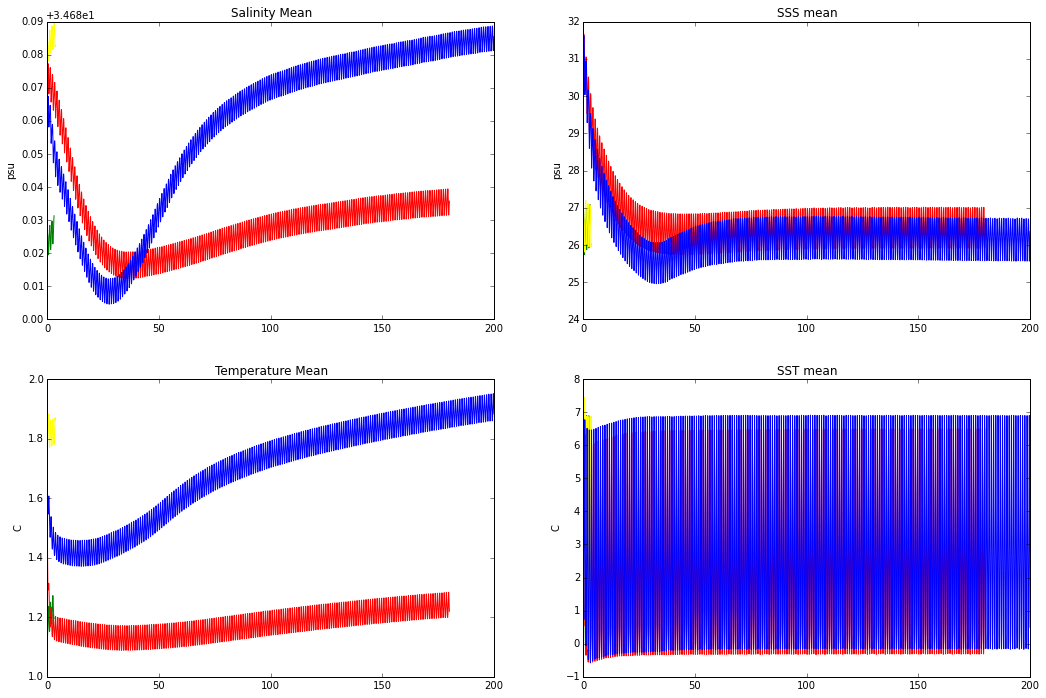

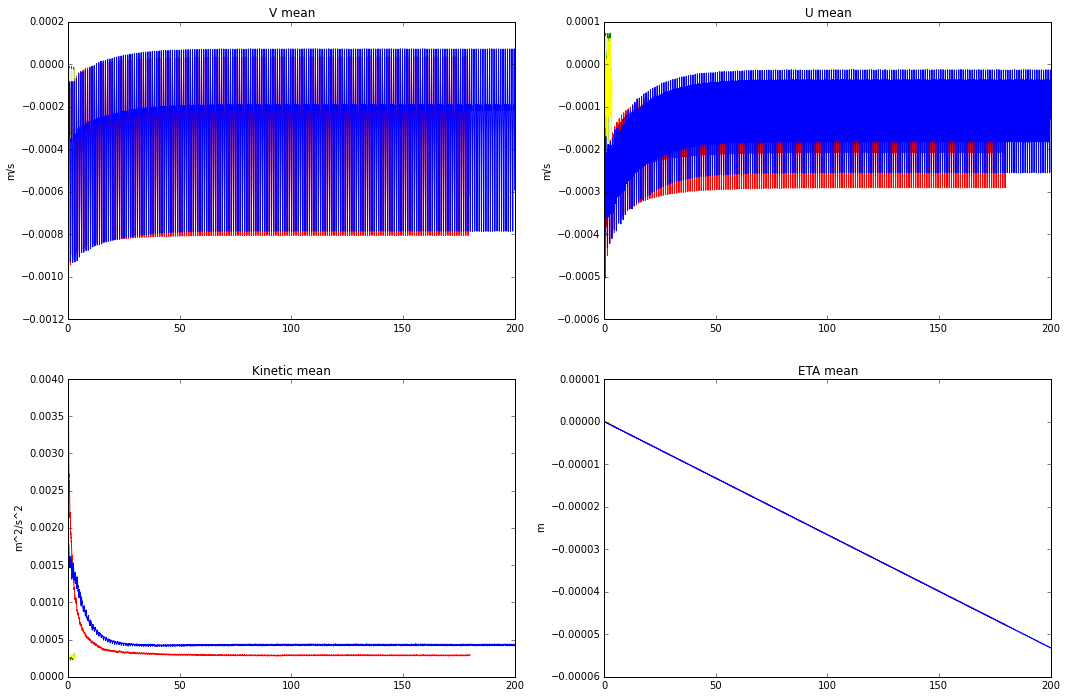

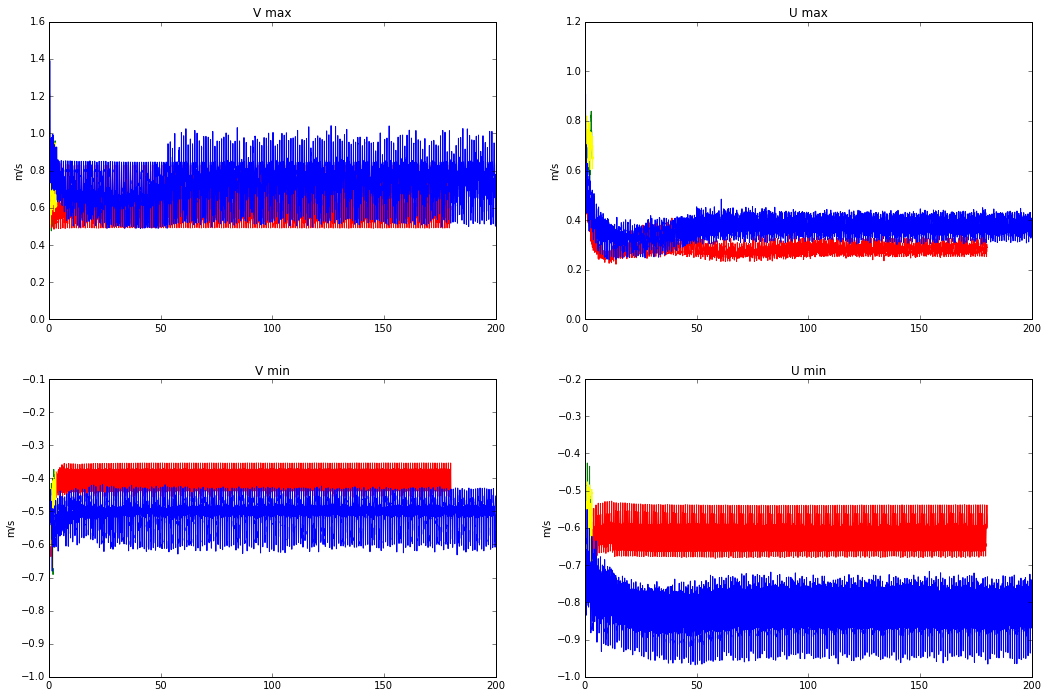

In [116]:
plot_monitor(monitor_list1,['salt_mean','sss_mean','theta_mean','sst_mean'])
plot_monitor(monitor_list1,['vvel_mean','uvel_mean','ke_mean','eta_mean'])
plot_monitor(monitor_list1,['vvel_max','uvel_max','vvel_min','uvel_min'])


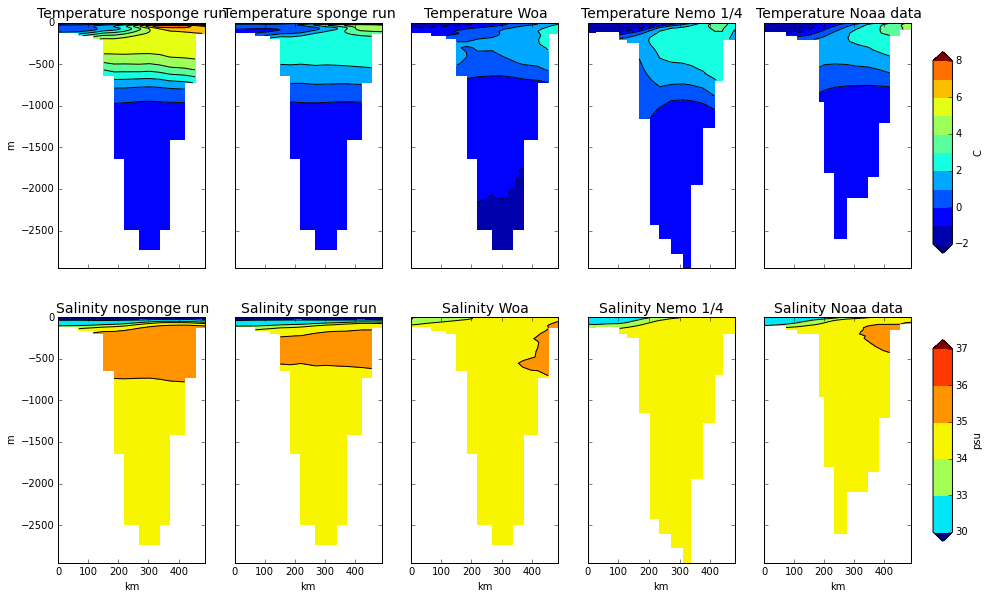

In [129]:
comp_plot(comp_data,fram)

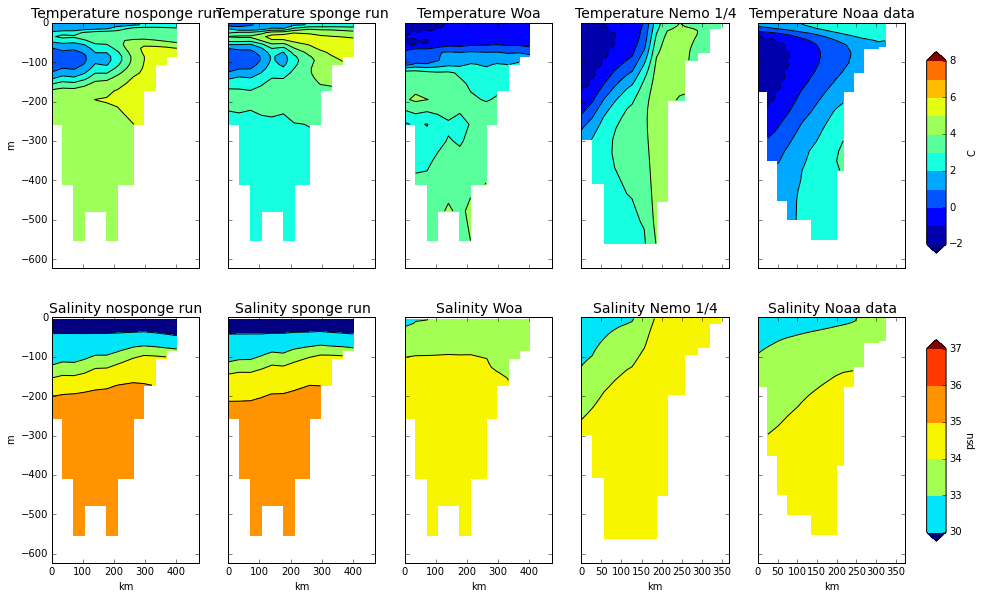

In [130]:
comp_plot(comp_data,davis)

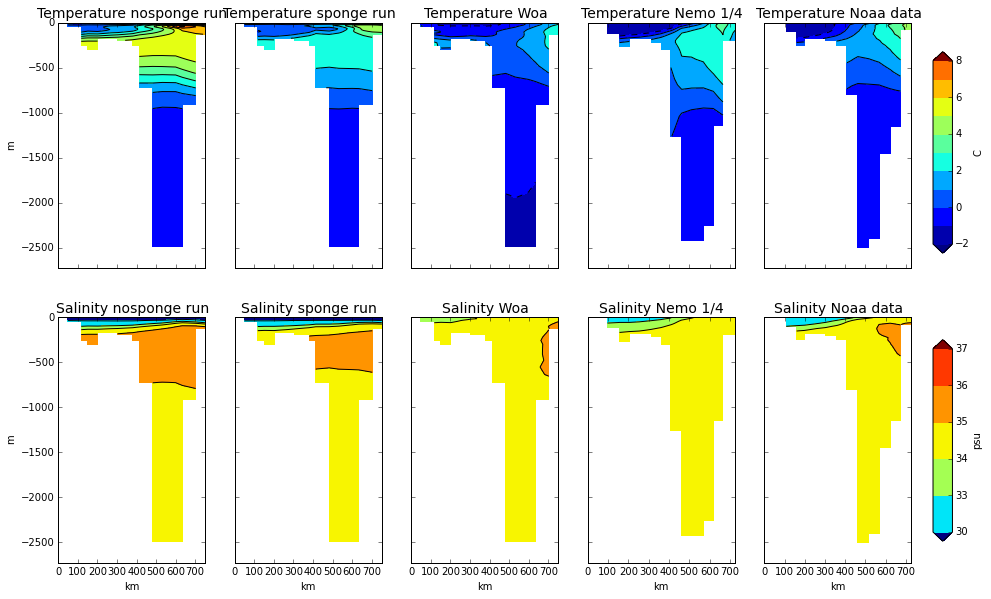

In [131]:
comp_plot(comp_data,barents)

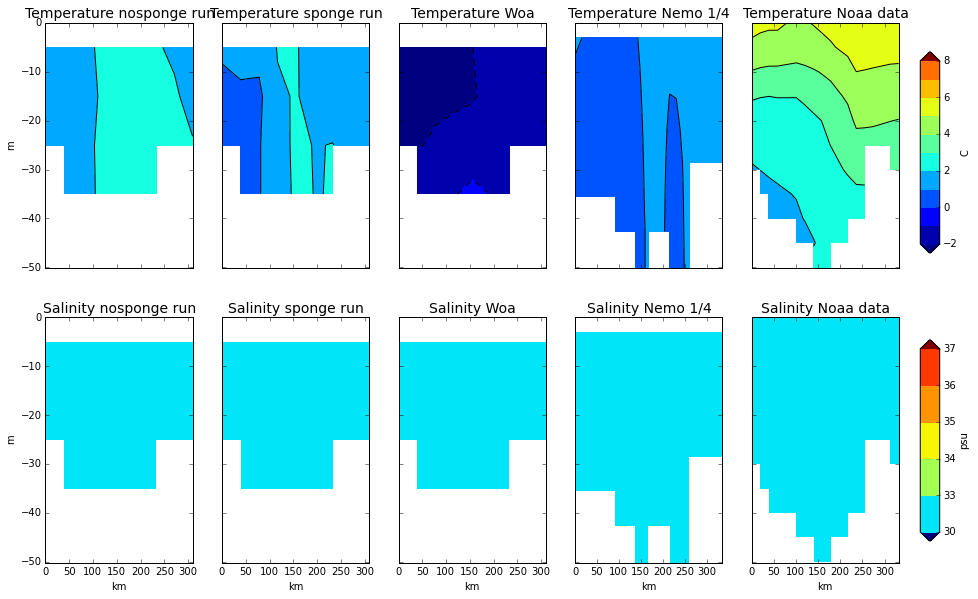

In [133]:
comp_plot(comp_data,bering)

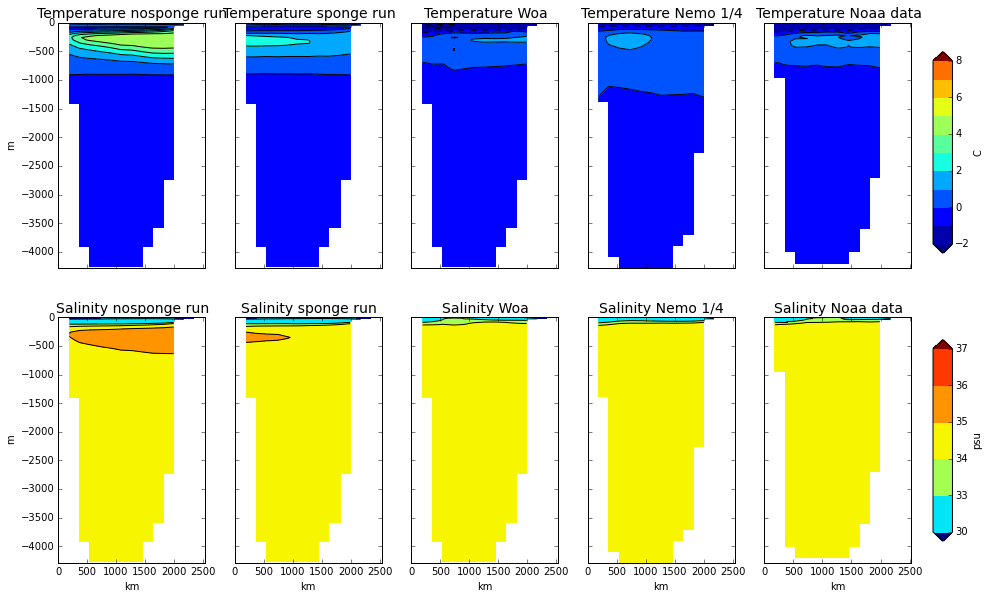

In [134]:
comp_plot(comp_data,arctic1)

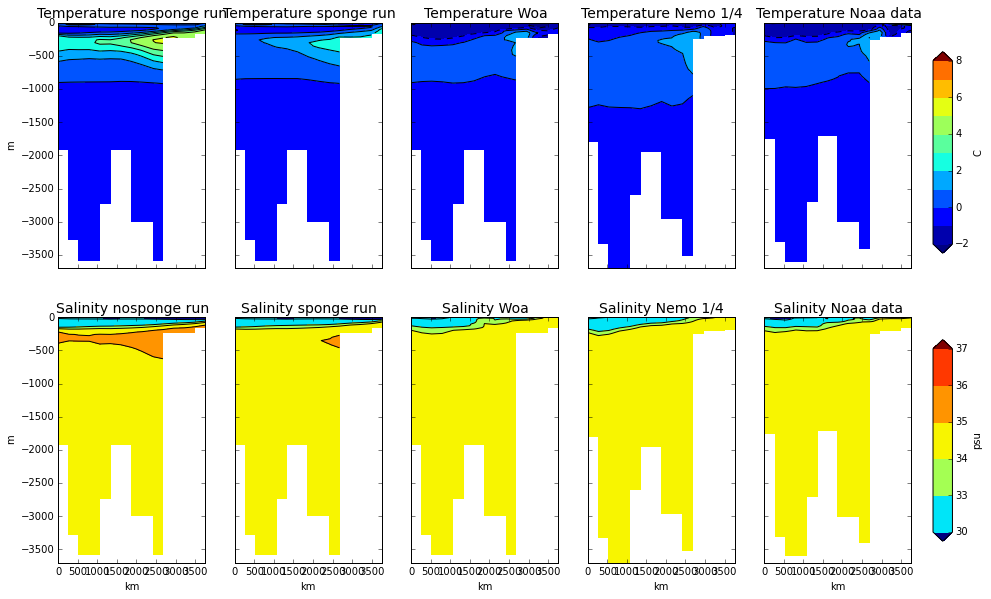

In [135]:
comp_plot(comp_data,arctic2)

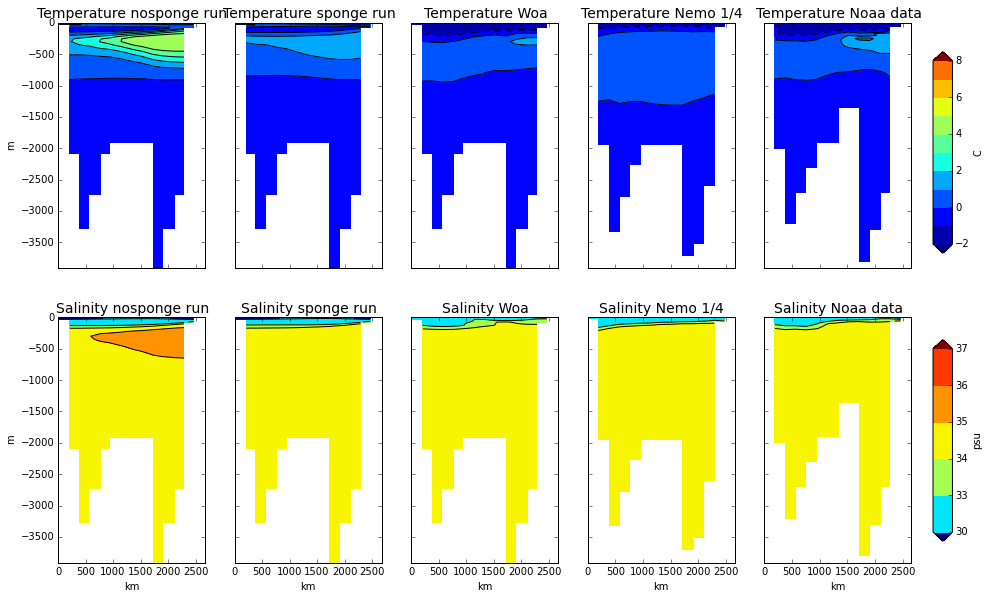

In [136]:
comp_plot(comp_data,arctic3)

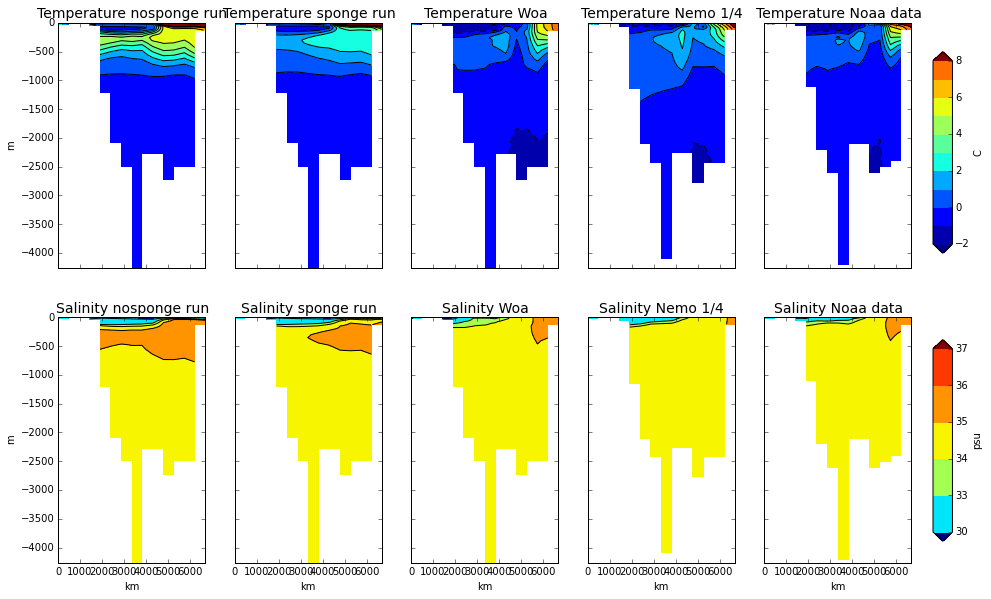

In [137]:
comp_plot(comp_data,arctic4)